In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [8]:
# Whether balanced
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


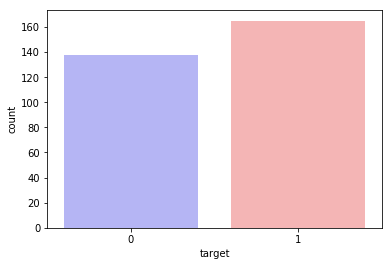

In [10]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

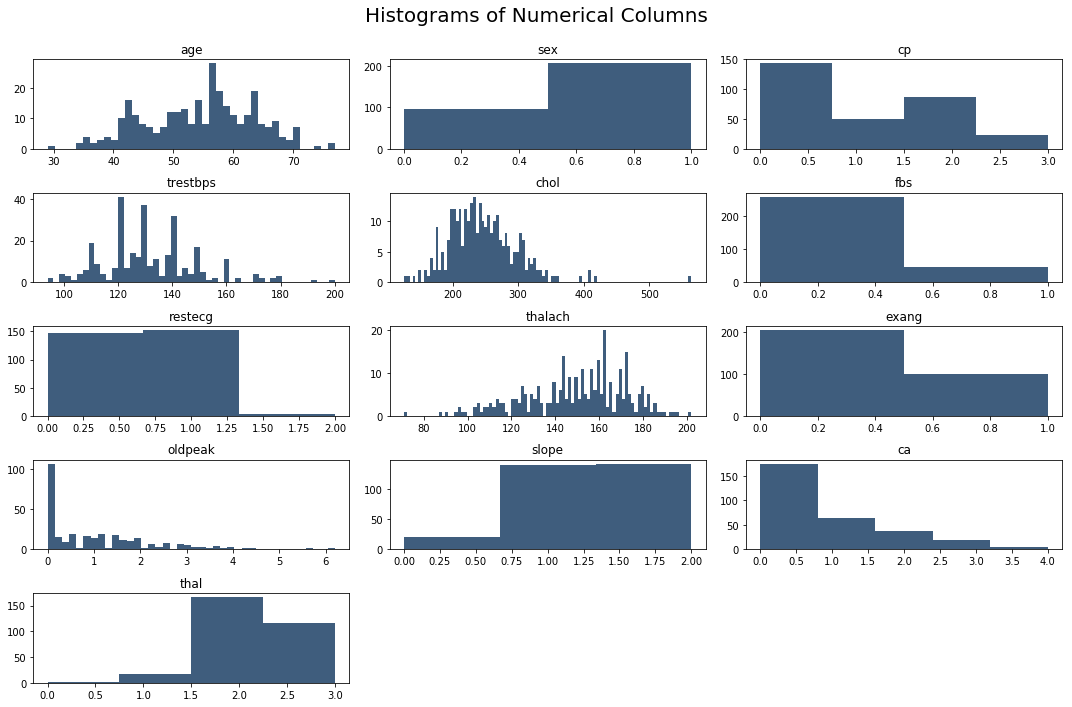

In [11]:
## Histograms

df2 = df.drop(columns = ['target'])

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

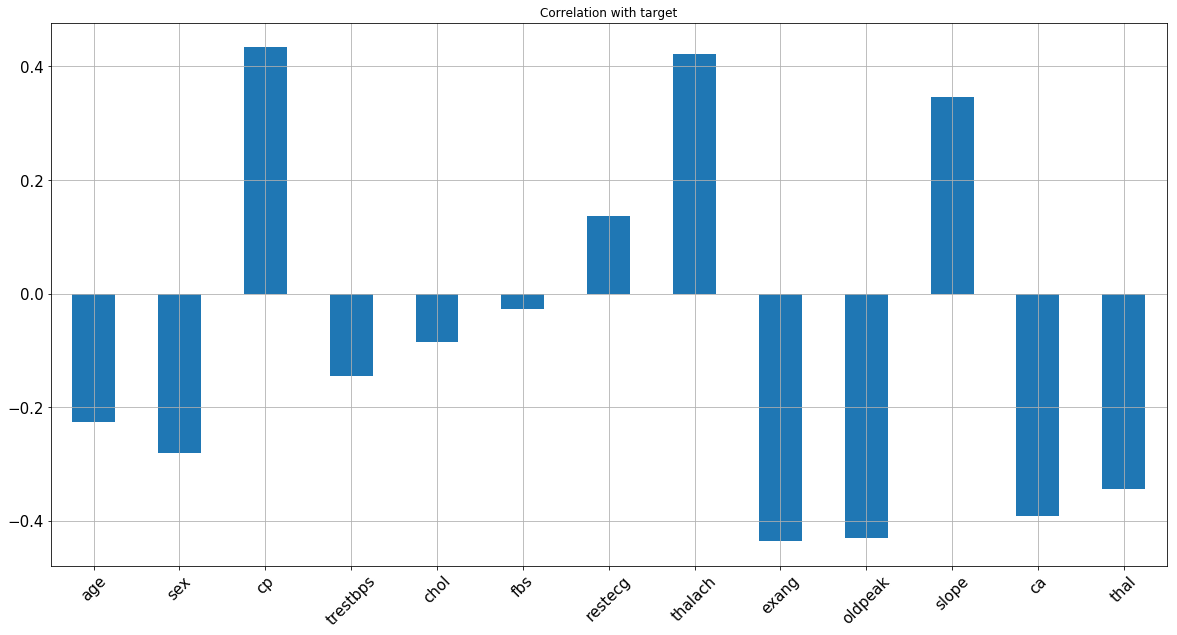

In [12]:
## Correlation with Response Variable (Note: Models like RF are not linear like these)

df2.corrwith(df.target).plot.bar(
        figsize = (20, 10), title = "Correlation with target", fontsize = 15,
        rot = 45, grid = True)

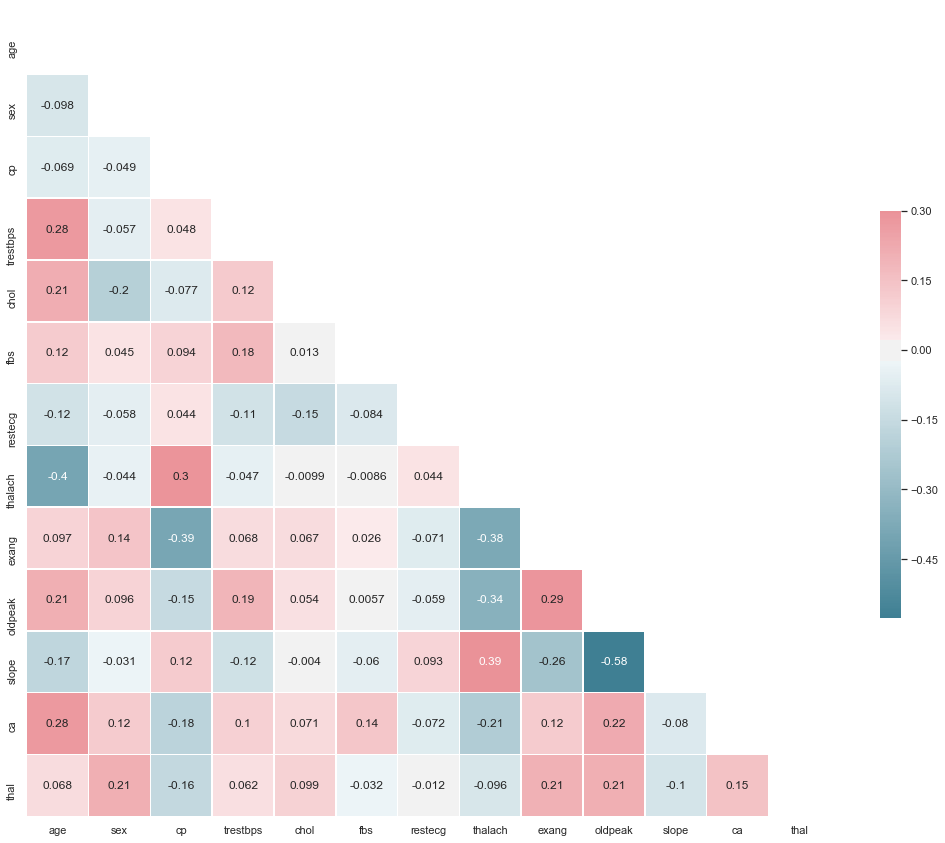

In [13]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
#Feature Enginnering

In [15]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [17]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [18]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

PCA

Shape of the Data Matrix before reducing dimension:  (242, 30)
Shape of the Data Matrix after reducing dimension:  (242, 2)


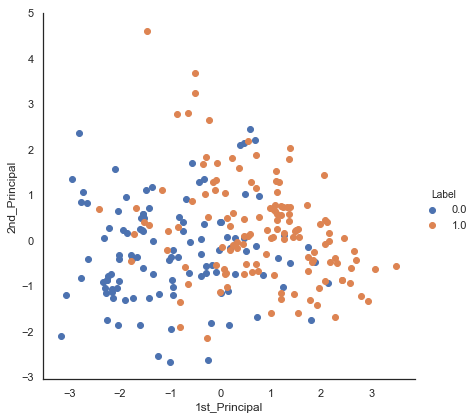

In [20]:
#Initialize the PCA
from sklearn import decomposition
pca = decomposition.PCA()

#Configure the parameteres: Number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train)

#pca_data will contain the 2-D projections of X_train
print("Shape of the Data Matrix before reducing dimension: ",X_train.shape)
print("Shape of the Data Matrix after reducing dimension: ",pca_data.shape)

#Attaching the label for each 2D data point. 
pca_data = np.vstack((pca_data.T, y_train)).T

#Creating a new dataframe which help us in ploting the result data. The new dataframe contains the reduced dimension of X_train along with the class label.
pca_df = pd.DataFrame(data=pca_data, columns=("1st_Principal", "2nd_Principal", "Label"))
sn.FacetGrid(pca_df, hue="Label", size=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

TSNE

In [21]:
from sklearn.manifold import TSNE
def tsne(dataset, labels, perplexity):
    labels=labels.apply(lambda x: 'patient' if x==1.0 else 'Not patient')
    '''This function is used to plot the t-sne for any input dataset using their corresponding class labels,
    using two dimensions.'''
    
    #Starting TSNE dataset transform
    model = TSNE(n_components=2, init='random', random_state=0, verbose=2,  angle=0.5, method='barnes_hut', perplexity=perplexity, n_iter=2000)
    tsne_data = model.fit_transform(dataset)

    #Creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Transaction Type"))
    
    #Info
    print("\nT-SNE Plot for perplexity = {}".format(perplexity))
    
    # Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="Transaction Type", height=6).map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
    plt.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.000s...
[t-SNE] Computed neighbors for 303 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 0.821206
[t-SNE] Computed conditional probabilities in 0.047s
[t-SNE] Iteration 50: error = 84.9280090, gradient norm = 0.4632889 (50 iterations in 0.215s)
[t-SNE] Iteration 100: error = 84.3947220, gradient norm = 0.4844942 (50 iterations in 0.130s)
[t-SNE] Iteration 150: error = 83.6193695, gradient norm = 0.4857354 (50 iterations in 0.098s)
[t-SNE] Iteration 200: error = 83.8739166, gradient norm = 0.5014499 (50 iterations in 0.109s)
[t-SNE] Iteration 250: error = 86.8041000, gradient norm = 0.4296432 (50 iterations in 0.109s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.804100
[t-SNE] Iteration 300: error = 1.6956323, gradient norm = 0.0101184 (50 iterations in 0.109s)
[t-SNE] Iteration 350: error = 1.4632913, gradient norm = 0.0033750 (

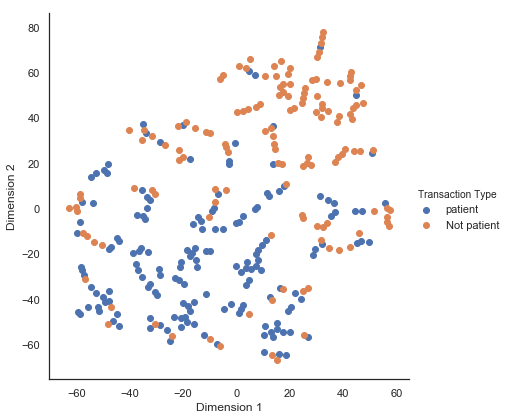

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.000s...
[t-SNE] Computed neighbors for 303 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 1.413165
[t-SNE] Computed conditional probabilities in 0.040s
[t-SNE] Iteration 50: error = 59.9418106, gradient norm = 0.5278301 (50 iterations in 0.217s)
[t-SNE] Iteration 100: error = 60.1262207, gradient norm = 0.4917978 (50 iterations in 0.231s)
[t-SNE] Iteration 150: error = 61.4315681, gradient norm = 0.5084987 (50 iterations in 0.187s)
[t-SNE] Iteration 200: error = 61.1224670, gradient norm = 0.4861148 (50 iterations in 0.189s)
[t-SNE] Iteration 250: error = 60.1945190, gradient norm = 0.5379410 (50 iterations in 0.253s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.194519
[t-SNE] Iteration 300: error = 0.9300346, gradient norm = 0.0033993 (50 iterations in 0.153s)
[t-SNE] Iteration 350: error = 0.8793380, gradient norm = 0.0013248 

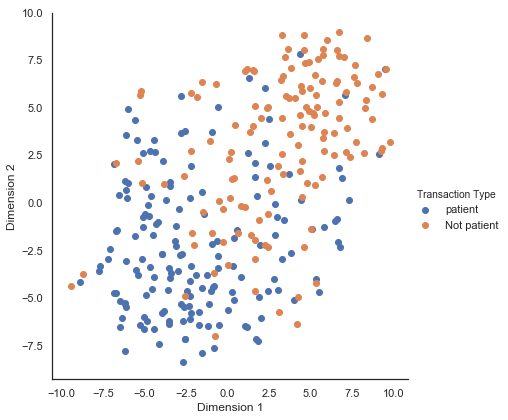

In [22]:
tsne(X, y, 5)
tsne(X, y, 50)


### Comparing Models

#### 1. Logistic Regressions

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from datetime import datetime as dt

st=dt.now()
tuned_parameters = {'C': np.logspace(-4,3,50),
                     'penalty': ['l1','l2'] } #C values used for cross validation

model = LogisticRegression(n_jobs=-1, random_state=1)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=10, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s


Time taken to complete random search:  0:00:06.211745


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished


In [24]:
rsearch_cv.best_params_

{'penalty': 'l2', 'C': 3.727593720314938}

In [25]:
lr=LogisticRegression(C=3.727593720314938,penalty='l2')
lr.fit(X_train,y_train)

LogisticRegression(C=3.727593720314938, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred=lr.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc=roc_auc_score(y_test,y_pred)

In [28]:
results = pd.DataFrame([['Linear Regression ', acc, prec, rec, f1,auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','Auc Score'])

In [29]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Auc Score
0,Linear Regression,0.885246,0.885714,0.911765,0.898551,0.881808


#### 2. KNN 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

st=dt.now()

tuned_parameters = {'n_neighbors': [3,5,7,9,11,13,15],
                    'weights': ['uniform','distance'],
                    'algorithm': ['ball_tree','kd_tree','brute'] }

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=10, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1)

rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.5s


Time taken to complete random search:  0:00:03.844019


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


In [31]:
rsearch_cv.best_params_

{'weights': 'distance', 'n_neighbors': 13, 'algorithm': 'brute'}

In [32]:
knn=KNeighborsClassifier(n_neighbors=13,algorithm='brute',weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance')

In [33]:
y_pred=knn.predict(X_test)

In [34]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc=roc_auc_score(y_test,y_pred)

In [35]:
model_results = pd.DataFrame([['KNN ', acc, prec, rec, f1,auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','Auc Score'])

In [36]:
results = results.append(model_results, ignore_index = True)

In [37]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Auc Score
0,Linear Regression,0.885246,0.885714,0.911765,0.898551,0.881808
1,KNN,0.852459,0.857143,0.882353,0.869565,0.848584


#### 3. Decision tree

In [38]:
from sklearn.tree import DecisionTreeClassifier


st=dt.now()

tuned_parameters = {'max_depth': np.arange(1,10,1),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                    'max_features': ['auto','sqrt','log2']} 

model = DecisionTreeClassifier(random_state=1)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=10, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1)

rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


Time taken to complete random search:  0:00:00.523485


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [39]:
rsearch_cv.best_params_

{'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 0.5,
 'min_samples_leaf': 9,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'entropy'}

In [40]:
dtree=DecisionTreeClassifier(min_weight_fraction_leaf=0.0,min_samples_split= 0.5,min_samples_leaf=9,
                         max_features= 'sqrt',max_depth= 9,criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=0.5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
y_pred=dtree.predict(X_test)

In [42]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc=roc_auc_score(y_test,y_pred)

In [43]:
model_results = pd.DataFrame([['Decision Tree ', acc, prec, rec, f1,auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','Auc Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,Auc Score
0,Linear Regression,0.885246,0.885714,0.911765,0.898551,0.881808
1,KNN,0.852459,0.857143,0.882353,0.869565,0.848584
2,Decision Tree,0.721311,0.697674,0.882353,0.779221,0.700436


#### 4. Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,1000,1500,2000,3000],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=1)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=10, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   25.7s


Time taken to complete random search:  0:00:55.604407


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   55.4s finished


In [45]:
rsearch_cv.best_params_

{'n_estimators': 40,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 25,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'entropy'}

In [46]:
rf=RandomForestClassifier(n_estimators= 40,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_leaf_nodes= 25,
 max_features= 'sqrt',
 max_depth= 5,
 criterion= 'entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_pred=rf.predict(X_test)

In [48]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc=roc_auc_score(y_test,y_pred)

In [49]:
model_results = pd.DataFrame([['RF ', acc, prec, rec, f1,auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','Auc Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,Auc Score
0,Linear Regression,0.885246,0.885714,0.911765,0.898551,0.881808
1,KNN,0.852459,0.857143,0.882353,0.869565,0.848584
2,Decision Tree,0.721311,0.697674,0.882353,0.779221,0.700436
3,RF,0.868852,0.882353,0.882353,0.882353,0.867102


#### 5. xgBoost

In [50]:
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01,0.001,0.0001],
                    'n_estimators':[10,25,50,100,250,500,650,750,850,1000,1500,2000,3000],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7,9],
                    'max_depth': [3,4,5,6,7,9,11,13,15,17,20,25,50],
                    'colsample_bytree':[0.6,0.7,0.8],
                    'gamma':[0,0.25,0.4,0.5,0.55,0.7,1]}

model = XGBClassifier(random_state=1)

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.2s finished


Time taken to complete random search:  0:00:04.684990


In [51]:
rsearch_cv.best_params_

{'subsample': 0.8,
 'n_estimators': 650,
 'min_child_weight': 5,
 'max_depth': 25,
 'learning_rate': 0.01,
 'gamma': 1,
 'colsample_bytree': 0.7}

In [52]:
xg=XGBClassifier(subsample= 0.8,
 n_estimators= 650,
 min_child_weight= 5,
 max_depth=25,
 learning_rate=0.01,
 gamma= 1,
 colsample_bytree= 0.7)
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=25,
              min_child_weight=5, missing=None, n_estimators=650, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [53]:
y_pred=xg.predict(X_test)

In [54]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc=roc_auc_score(y_test,y_pred)

In [55]:
model_results = pd.DataFrame([['xgBoost ', acc, prec, rec, f1,auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','Auc Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,Auc Score
0,Linear Regression,0.885246,0.885714,0.911765,0.898551,0.881808
1,KNN,0.852459,0.857143,0.882353,0.869565,0.848584
2,Decision Tree,0.721311,0.697674,0.882353,0.779221,0.700436
3,RF,0.868852,0.882353,0.882353,0.882353,0.867102
4,xgBoost,0.852459,0.857143,0.882353,0.869565,0.848584


#### 6. SVM

In [56]:
from sklearn.svm import SVC

st=dt.now()
tuned_parameters = {'C':np.logspace(-3,4,25), 
                    'gamma':np.logspace(-3,1,8)}

model = SVC(random_state=1)

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=10, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


Time taken to complete random search:  0:00:00.656207


[Parallel(n_jobs=-1)]: Done  72 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [57]:
rsearch_cv.best_params_

{'gamma': 0.001, 'C': 1333.521432163324}

In [58]:
classifier = SVC( gamma=0.001,C=1333.521432163324)
classifier.fit(X_train, y_train)

SVC(C=1333.521432163324, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
y_pred=classifier.predict(X_test)

In [60]:
model_results = pd.DataFrame([['svc ', acc, prec, rec, f1,auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','Auc Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,Auc Score
0,Linear Regression,0.885246,0.885714,0.911765,0.898551,0.881808
1,KNN,0.852459,0.857143,0.882353,0.869565,0.848584
2,Decision Tree,0.721311,0.697674,0.882353,0.779221,0.700436
3,RF,0.868852,0.882353,0.882353,0.882353,0.867102
4,xgBoost,0.852459,0.857143,0.882353,0.869565,0.848584
5,svc,0.852459,0.857143,0.882353,0.869565,0.848584
